In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import astropy.units as u
import astropy.constants as const

### Part 5

Text(0.5, 0, 'squiggle')

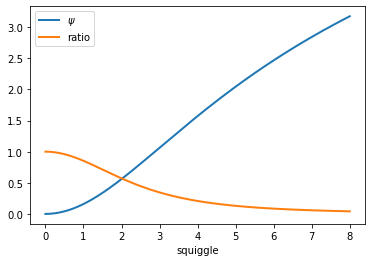

In [2]:
### Krumholz Code
# definition of the derivatives
def derivs(y, x):
    return( [y[1], -2*y[1]/x+np.exp(-y[0])] )
# starting points
x0 = 1e-4
y0 = [x0**2/6, x0/3]
# solve the ode
x = np.linspace(x0, 8, 200)
ysol = odeint(derivs, y0, x)
# plot psi and exp(-psi) vs. x
plt.plot(x, ysol[:,0], lw=2, label="$\psi$")
plt.plot(x, np.exp(-ysol[:,0]), lw=2,
label="ratio")
plt.legend(loc="upper left")
plt.xlabel("squiggle")


$\frac{d \psi}{d \xi} = \psi'$

$\frac{d \psi'}{d \xi} = -2 \frac{\psi'}{\xi} + e^{-\psi}$

$6 a_2 + 12 a_3 \xi + O(\xi^2) = 1 + O(\xi^2)$

Near $\xi = 0$,

$\psi = \frac{\xi^2}{6} + O(\xi^4)$

so

$\psi' = \frac{\xi}{3}$

In [3]:
### My code

def derivatives(x, y):
    return [y[1], -2*y[1]/x + np.exp(-1*y[0])]

xi = 10.**(-5)
psi0 = (xi**2) / 6.
psiprime0 = xi / 3.

sol = solve_ivp(derivatives,
    t_span=(xi, 10.),
    y0=[psi0, psiprime0],#,method='LSODA')
    t_eval=np.linspace(xi, 10., 500000))

In [4]:
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 74
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([1.000000e-05, 3.000002e-05, 5.000004e-05, ..., 9.999960e+00,
       9.999980e+00, 1.000000e+01])
 t_events: None
        y: array([[1.66666667e-11, 1.50000200e-10, 4.16667333e-10, ...,
        3.73556313e+00, 3.73556816e+00, 3.73557318e+00],
       [3.33333333e-06, 1.00000067e-05, 1.66666800e-05, ...,
        2.51081923e-01, 2.51081396e-01, 2.51080869e-01]])
 y_events: None


In [5]:
print('xi')
print(sol.t)
print('psi')
print(sol.y[0])
print('psi prime')
print(sol.y[1])

xi
[1.000000e-05 3.000002e-05 5.000004e-05 ... 9.999960e+00 9.999980e+00
 1.000000e+01]
psi
[1.66666667e-11 1.50000200e-10 4.16667333e-10 ... 3.73556313e+00
 3.73556816e+00 3.73557318e+00]
psi prime
[3.33333333e-06 1.00000067e-05 1.66666800e-05 ... 2.51081923e-01
 2.51081396e-01 2.51080869e-01]


Remember: 
$\rho / \rho_c = e^{-\psi}$

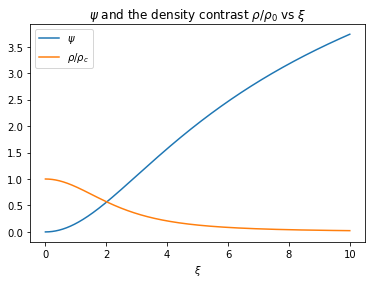

In [6]:
plt.plot(sol.t, sol.y[0], label=r'$\psi$')
plt.plot(sol.t, np.exp(-1*sol.y[0]), label=r'$\rho / \rho_c$')
plt.legend()
plt.xlabel(r'$\xi$')
plt.title(r'$\psi$ and the density contrast $\rho / \rho_0$ vs $\xi$')
print()

### Part 7

Plot the dimensionless mass $m = M/(c^4_s/\sqrt{G^3P_s})$ versus the dimensionless
density contrast $\rho_c / \rho_s = e^{-\psi_s}$, where $\psi_s$ is the value of $\psi$ at $\xi = \xi_s$. You
will see that m reaches a finite maximum value mmax at a particular value
of $\rho_c / \rho_s$. Numerically determine $m_{max}$, along with the density contrast
$\rho_c / \rho_s$ at which it occurs.

$\xi_s = \frac{R}{r_0}$

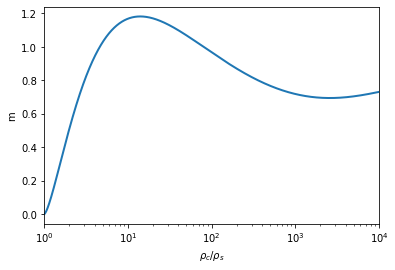

In [7]:
### Krumholz

# solve the ode on a slightly larger grid
x = np.linspace(x0, 1e3, 500000)
ysol = odeint(derivs, y0, x)
# Get density constrast and m
contrast = np.exp(ysol[:,0])
m = (x**2 * np.exp(-ysol[:,0]/2) * ysol[:,1]) \
    / np.sqrt(4.0*np.pi)
# Plot
plt.clf()
plt.plot(contrast, m, lw=2)
plt.xscale('log')
plt.xlabel(r'$\rho_c/\rho_s$')
plt.ylabel('m')
plt.xlim([1,1e4])
print()

$m = M/(c^4_s/\sqrt{G^3P_s})$ 

$M = \frac{c^4_s}{\sqrt{4 \pi G^3 P_s}}(e^{-\psi/2} \xi^2 \frac{d \psi}{d \xi})_{\xi_s}$

so,

$m = \frac{1}{\sqrt{4\pi}} (e^{-\psi/2} \xi^2 \frac{d \psi}{d \xi})_{\xi_s}$

$P_s = \rho_s c_s^2$

$\rho_c / \rho_s = e^{-\psi_s}$

In [8]:
### My code

def derivatives(x, y):
    return [y[1], -2*y[1]/x + np.exp(-1*y[0])]

xi = 10.**(-5)
psi0 = (xi**2) / 6.
psiprime0 = xi / 3.
stop = 1e3

sol = solve_ivp(derivatives,
    t_span=(xi, stop),
    y0=[psi0, psiprime0], #method="LSODA")
    t_eval=np.linspace(xi, stop, 500000))


In [9]:
xis = sol.t
psi = sol.y[0]
psiprime = sol.y[1]

density_contrast = np.exp(-1*psi)

m = (1./np.sqrt(4.*np.pi))*(np.exp(-1.*psi/2) * xis**2 * psiprime)

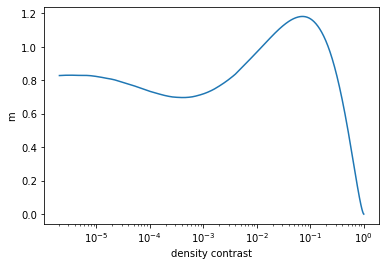

In [10]:
plt.plot(density_contrast, m)
plt.xlabel('density contrast')
plt.ylabel('m')
plt.xscale('log')

There is a bit of an issue where Krumholz defines $\rho / \rho_c = e^{\psi}$ and the homework defines $\rho_c / \rho_s = e^{-\psi_s}$. I will use the homework's definition. 

In [11]:
np.amax(m)

1.1823432163857868

In [12]:
density_contrast[np.argmax(m)]**(-1)

13.983277903609203

$m_{max} = 1.18$ at $\rho_c / \rho_s = 0.0799$

### Part 8

$P_{s, max} = \frac{m_{max}^2 c_s^8}{G^3 M^2}$

In [13]:
mmax = np.amax(m)
print(mmax**2)

1.3979354813334874


The problem references a result in part (a), which I am going to assume is Part 2.

$P_s = \frac{3M}{8\pi} (\frac{c_s^2}{R^3} - \frac{GM}{5R^4})$

$R = \frac{4GM}{15c_s^2}$

$P_{s,max} = \frac{3M}{8\pi}(c_s^2 (\frac{15 c_s^2}{4GM})^3 - \frac{GM}{5}(\frac{15 c_s^2}{4GM})^4)$

In [14]:
con = (3./(8.*np.pi))*((15./4.)**3. - (1./5.)*(15./4.)**4.)
print(con)

1.5736755847709378


Part 2:

$P_{s,max} = 1.57 \frac{c_s^2}{G^3M^2}$

Part 8: 

$P_{s, max} = 1.40 \frac{c_s^8}{G^3 M^2}$

The two are only slightly different.

### Part 9

$M_{BE} = m_{max}\frac{c_s^4}{\sqrt{G^3 P_s}} = 1.18 \frac{c_s^4}{\sqrt{G^3 P_s}}$

Surface Pressure on core: $P_s/k_B = 3 \times 10^5 K cm^{−3}$

Temperature: $T = 10 K$

Standard mean molecular weight: $\mu = 2.3$

$c_s = \sqrt{k_B * T / \mu}$

In [15]:
def sound_speed(T):
    kB = 1.3807 * 10**(-16) #cm2 g s-2 K-1
    mu = 2.3 * 1.6726219 * 10**(-24) #grams
    return np.sqrt(kB*T/mu)

def mass_BE(PskB, T):
    kB = 1.3807 * 10**(-16) #cm2 g s-2 K-1
    G = 6.6743 * 10**(-8) #cm3 g-1 s-2
    mu = 2.3 * 1.6726219 * 10**(-24) #grams
    cs = sound_speed(T)
    mBE = 1.18 * cs**4 / np.sqrt(G**3 * PskB * kB)
    return mBE # grams

In [16]:
kB = 1.3807 * 10**(-16) #cm2 g s-2 K-1
G = 6.6743 * 10**(-8) #cm3 g-1 s-2
Msun = 2 * 10**33 #g

### Low mass star forming region core
PskB1 = 3. * 10**5 # K cm-3
T1 = 10. # K
m1 = mass_BE(PskB1, T1) / Msun
print('Low mass star forming regions core:', m1, 'solar masses')

### Galactic Centers and dense star forming regions in the early universe
PskB2 = 10**7 # K cm-3
T2 = 50. # K
m2 = mass_BE(PskB2, T2) / Msun
print('Galactic Center and Dense star forming regions:', m2, 'solar masses')

Low mass star forming regions core: 0.6848264984506806 solar masses
Galactic Center and Dense star forming regions: 2.965385724215169 solar masses


### Part 10

Find the size $r_0$ and central density $\rho_c$.

$r_0 = \frac{c_s}{\sqrt{4 \pi G \rho_c}}$

$\rho = \rho_c e^{-\phi / c_s^2}$ where $\phi = 0$ at $r = 0$, $\rho_c = \rho(r=0)$

$P = \rho c_s^2$

$\rho_c = \frac{P}{c_s^2}$

In [17]:
def core_density(PskB, T):
    kB = 1.3807 * 10**(-16) #cm2 g s-2 K-1
    Ps = PskB * kB
    cs = sound_speed(T)
    return Ps / cs**2

def init_size(PskB, T):
    G = 6.6743 * 10**(-8) #cm3 g-1 s-2
    cs = sound_speed(T)
    rhoC = core_density(PskB, T)
    return cs / np.sqrt(4 * np.pi* G * rhoC)


In [18]:
rhoC1 = core_density(PskB1, T1)
r01 = init_size(PskB1, T1)

print('The r0 for low mass star forming regions is', r01, 'cm, with a central density of', rhoC1, 'g cm-3')

rhoC2 = core_density(PskB2, T2)
r02 = init_size(PskB2, T2)

print('The r0 for Galactic Center and high density star forming regions is', r02, 'cm, with a central density of', rhoC2, 'g cm-3')


The r0 for low mass star forming regions is 6.089135331788422e+16 cm, with a central density of 1.1541091109999997e-19 g cm-3
The r0 for Galactic Center and high density star forming regions is 5.27334588441016e+16 cm, with a central density of 7.694060739999999e-19 g cm-3


### Part 11

Enclosed mass:

$M = \frac{c^4_s}{\sqrt{4 \pi G^3 P_s}}(e^{-\psi/2} \xi^2 \frac{d \psi}{d \xi})_{\xi_s}$

$\xi_s = \frac{R}{r_0}$

Average enclosed density:

$\rho = \rho_c e^{-\phi / c_s^2}$

$\psi = \frac{\phi}{c_s^2}$

$\rho = \rho_c e^{-\psi}$


In [19]:
#print(sol)

# Mass enclosed
# m = (1./np.sqrt(4.*np.pi))*(np.exp(-1.*psi/2) * xis**2 * psiprime)

def mass_enclosed(m, PskB, T):
    cs = sound_speed(T)
    G = 6.6743 * 10**(-8) #cm3 g-1 s-2
    kB = 1.3807 * 10**(-16) #cm2 g s-2 K-1
    return m * (cs**4 / np.sqrt(G**3 * PskB * kB))

def density_enclosed(rhoC, psi):
    return rhoC * np.exp(-1*psi)

In [20]:
#m = xi**2 * psiprime 

R1 = xis * r01 # cm
M_encl_1 = mass_enclosed(m, PskB1, T1)
rho_encl_1 = density_enclosed(rhoC1, psi)

R2 = xis * r02 # cm
M_encl_2 = mass_enclosed(m, PskB2, T2)
rho_encl_2 = density_enclosed(rhoC2, psi)

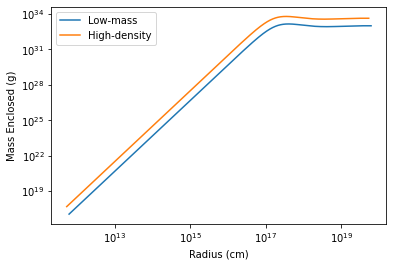

In [21]:
plt.plot(R1, M_encl_1, label='Low-mass')
plt.plot(R2, M_encl_2, label='High-density')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (cm)')
plt.ylabel('Mass Enclosed (g)')
plt.show()


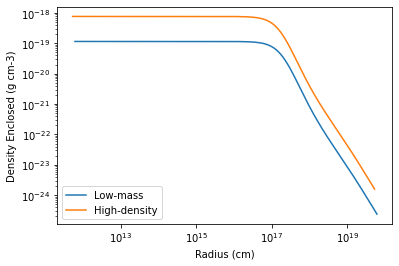

In [22]:
plt.plot(R1, rho_encl_1, label='Low-mass')
plt.plot(R2, rho_encl_2, label='High-density')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (cm)')
plt.ylabel('Density Enclosed (g cm-3)')
plt.show()

### Part 12

$\rho(r) = \rho_c \frac{(c \times r_0)^\alpha}{(c \times r_0)^\alpha + r^\alpha}$

In [23]:
def density_profile(rhoC, c, alpha, r0, xis):
    return rhoC * (c * r0)**alpha / ((c * r0)**alpha + (xis*r0)**alpha)

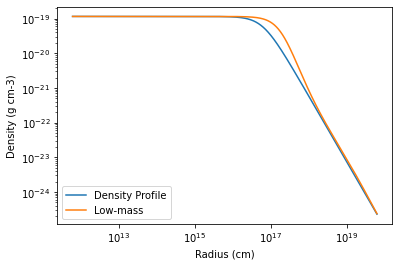

In [24]:
c = 1
alpha = 1.9

plt.plot(xis*r01, density_profile(rhoC1, c, alpha, r01, xis), label='Density Profile')
plt.plot(R1, rho_encl_1, label='Low-mass')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (cm)')
plt.ylabel('Density (g cm-3)')
plt.legend()

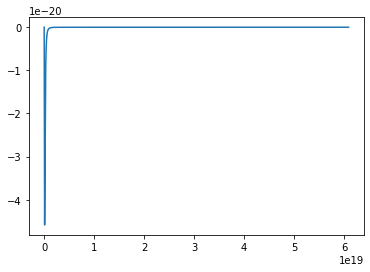

In [25]:
plt.plot(xis*r01, density_profile(rhoC1, c, alpha, r01, xis)-rho_encl_1)
#plt.xscale('log')
#plt.yscale('log')

Referencing the plot above, the numerical approximation is reasonable for $r < 10^{16}$ cm and $r > 10^{18}$ cm.

### Part 13

B68 is a real Bonnor-Ebert sphere. It has a measured shape parameter $\xi_{max} = 6.9$. Is the core stable? Recall that in part 7, you determined the
maximum stable dimensionless mass.

In [26]:
print('Max stable dimensionless mass:', np.amax(m))
print('\u03BE at max stable mass:', xis[np.argmax(m)])

Max stable dimensionless mass: 1.1823432163857868
ξ at max stable mass: 6.442022819605639


The core is not stable, as $\xi_{max} = 6.9 > \xi (m_{max} = 1.18)$. The radius of B68 is larger than the largest stable core. You cannot have a core that large that is stable. 

### Part 14

B68 has an outer radius of $150$" at its distance of $128$ AU. Its average temperature is $T = 10.5$ K. What is its central density $\rho_c$? Recall Part 4 and the definition $\xi = r / r_0$ (so $\xi_{max} = r_{max} / r_0$).

$r_0 = \frac{c_s}{\sqrt{4 \pi G \rho_c}}$

$\xi_{max} = 6.9$ for B68, so using the plot from Part 7, we can find that the dimensionless mass is $1.1785978437597164$ and the density contrast $\rho_c / \rho_s = 0.06004161898187409$. 

$\rho_c = 0.06 \rho_s$

$\rho_c = \rho_s e^{-\psi_s}$

$P_s = \rho_s c_s^2$ => $\rho_s = P_s / c_s^2$

$P_s = \frac{m^2 c_s^8}{G^3 M^2}$

$M = $

$\rho_c = \frac{P_s}{c_s^2} e^{-\psi_s}$



In [27]:
print('nearest xi:',xis[37])
print('density contrast:',density_contrast[37])
print('dimensionless mass:',m[37])
print('psi:',psi[37])

nearest xi: 0.07401014726029452
density contrast: 0.9990877516962566
dimensionless mass: 3.8081335697833996e-05
psi: 0.0009126646554572361


In [28]:
dist = (128 * u.pc).to('cm') # pc
arcs = 150 * u.arcsec.to('rad') / 2 #arcsecond radius is half the diameter
#print(arcs)

radius_B68 = dist*arcs 
r0_B68 = radius_B68 / 6.9
#print(r0_B68)
#print(r0_B68)
#print(dist, arcs, r0_B68)
#PskB_B68 = 1 #2 * 10**4 #cm−3K
T_B68 = 10.5# * u.K #K 

#rhoS_B68 = (1.18**2*c_s**6 / M_BE**2 / constants.G**3)
rhoC_B68 = ((sound_speed(T_B68)*u.cm*u.s**(-1))**2 / (4 * np.pi * const.G.cgs * r0_B68**2))

print('The core density of B68:', rhoC_B68)#, 'g cm-3')

The core density of B68: 1.037175651288454e-18 g / cm3


In [29]:
radius_B68

<Quantity 1.43613956e+17 cm>

In [30]:
### From literature core density 
nH = 3.4 * 10**5 * u.cm**(-3)# cm-3
nH * const.m_p.to('g')

<Quantity 5.68691454e-19 g / cm3>

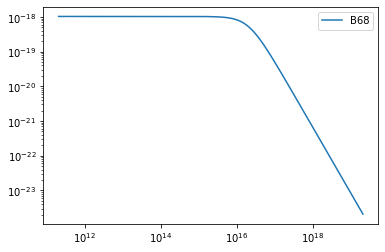

In [31]:
rho_B68 = density_profile(rhoC_B68, c, alpha, r0_B68, xis)
plt.plot(xis * r0_B68, rho_B68, label='B68')
#plt.plot(R1, rho_encl_1, label='Low-mass')

plt.xscale('log')
plt.yscale('log')
plt.legend()





### Part 15

Compare the surface pressure of B68 to the typical ISM pressure $P/k_B = 2 \times 10^4$ cm−3 K. Recall from part 6 that

$\frac{P}{P_c} = \frac{\rho}{\rho_c} = e^{\psi}$

and the ideal gas law ($P = \rho k_B T$).

$\rho_s = \rho_c e^{\psi_s}$

In [32]:
kB = const.k_B.cgs#1.3807 * 10**(-16) #cm2 g s-2 K-1
# Ideal Gas Law
PckB_B68 = (rhoC_B68 * T_B68 * u.K) / (const.m_p.cgs) #.to(u.K*u.cm**(-3))
PskB_B68 = PckB_B68 * np.exp(psi[np.argmax(m)])
PskB_B68

<Quantity 91044311.44588335 K / cm3>

In [33]:
print('Typical ISM pressure:', 2*10**4 * u.cm**(-3) * u.K)
print('B68 pressure:', PskB_B68)
print('Low mass star forming region pressure:', PskB1 * u.cm**(-3) * u.K)
print('High density star forming region pressure:', PskB2 * u.cm**(-3) * u.K)



Typical ISM pressure: 20000.0 K / cm3
B68 pressure: 91044311.44588335 K / cm3
Low mass star forming region pressure: 300000.0 K / cm3
High density star forming region pressure: 10000000.0 K / cm3


In [34]:
PskB_ISM = 2*10**4 * u.cm**(-3) * u.K
print('Ratio of the surface pressure of B68 to the typical ISM pressure:', PskB_B68 / PskB_ISM)

Ratio of the surface pressure of B68 to the typical ISM pressure: 4552.215572294167
